In [ ]:
'''Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18'''

Sample plot for temprature distribution. 



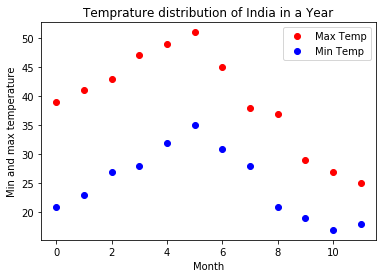

In [7]:
#Import standard python modules

import numpy as np                        # Numpy Module
import pandas as pd                       # Pandas Module
import matplotlib.pyplot as mat_plt       # Matplotlib Module
import scipy.optimize as scipy_optimize   # Scipy Module

#Input Data

Max=[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min=[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

# Convert temprature data into input data into numpy array
temp_max=np.array(Max)
temp_min=np.array(Min)

# Get year ( mothly) data
months= np.arange(12) #  month data for a year

#sample plot

print("Sample plot for temprature distribution. \n")
mat_plt.plot(months,temp_max,'ro',label='Max Temp')
mat_plt.plot(months,temp_min,'bo',label='Min Temp')
mat_plt.title("Temprature distribution of India in a Year")
mat_plt.xlabel('Month')
mat_plt.ylabel('Min and max temperature')
mat_plt.legend()
mat_plt.show()

In [2]:
# Create function
def yearly_temp_dist(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))


# Function execution and using scipy.optimize to fit data into curve 

popt_max, pcov_max = scipy_optimize.curve_fit(yearly_temp_dist, months,temp_max, [20, 10, 0])
popt_min, pcov_min = scipy_optimize.curve_fit(yearly_temp_dist, months,temp_min, [-40, 20, 0])

# Note Scipy.optimize.curve_fit returns 
#(1.) popt:an Optimal value array (1D array) & (2.) pcov: The estimated covariance of popt

print("Data for Max Temp\n")
print(popt_max, "\n")
print(pcov_max)
print("\nData for Min Temp\n")
print(popt_min,"\n")
print(pcov_min)

Data for Max Temp

[ 39.88861734 -10.59083166   1.33370154] 

[[ 1.28972692 -0.14357418 -0.02263924]
 [-0.14357418  2.57009611 -0.03276299]
 [-0.02263924 -0.03276299  0.07074015]]

Data for Min Temp

[25.55626462 -7.74472962  0.93101294] 

[[ 0.19941393 -0.02644226 -0.00351662]
 [-0.02644226  0.38392582 -0.00606194]
 [-0.00351662 -0.00606194  0.02114122]]


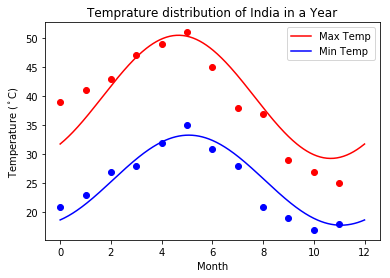

In [8]:
# generate days data to get temprature distribution throghout the year
days = np.linspace(0, 12, num=365)

#plot the data
mat_plt.plot(months, temp_max, 'ro')
mat_plt.plot(days, yearly_temp_dist(days, *popt_max),'r-', label='Max Temp')
mat_plt.plot(months, temp_min, 'bo')
mat_plt.plot(days, yearly_temp_dist(days, *popt_min),'b-', label='Min Temp')
mat_plt.title("Temprature distribution of India in a Year")
mat_plt.xlabel('Month')
mat_plt.ylabel('Temperature ($^\circ$C)')
mat_plt.legend()
mat_plt.show()